<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/sleep-pattern/student_sleep_pattrens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle

In [100]:
sleep=pd.read_csv('student_sleep_patterns.csv')

In [101]:
sleep.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [102]:
sleep.shape

(500, 14)

In [103]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [104]:
sleep.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [105]:
sleep.isna().sum()

,0
Student_ID,0
Age,0
Gender,0
University_Year,0
Sleep_Duration,0
Study_Hours,0
Screen_Time,0
Caffeine_Intake,0
Physical_Activity,0
Sleep_Quality,0


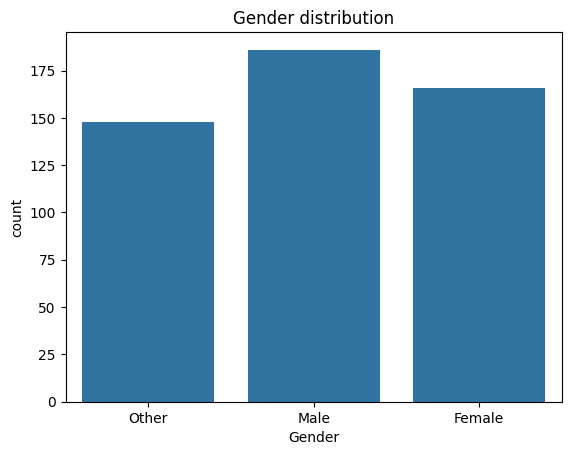

In [106]:
sleep['Gender'].value_counts().reset_index()
sns.countplot(x='Gender',data=sleep)
plt.title('Gender distribution')
plt.show()

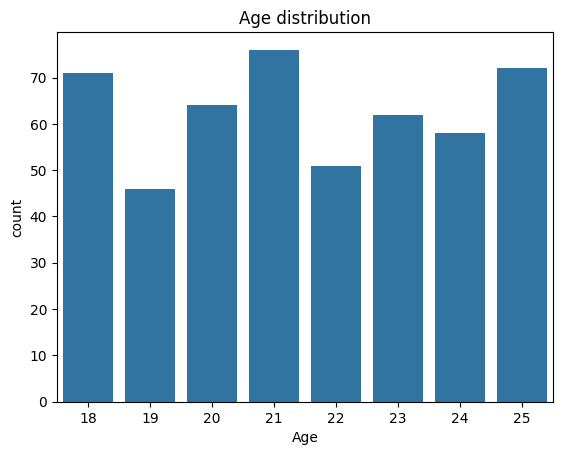

In [107]:
Age=sleep['Age'].value_counts().reset_index()
Age
sns.barplot(x='Age',y='count',data=Age)
plt.title('Age distribution')
plt.show()


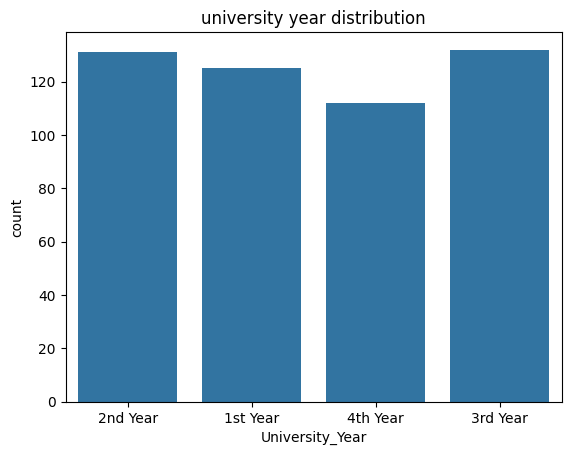

In [108]:
sns.countplot(data=sleep,x='University_Year')
plt.title('university year distribution')
plt.show()

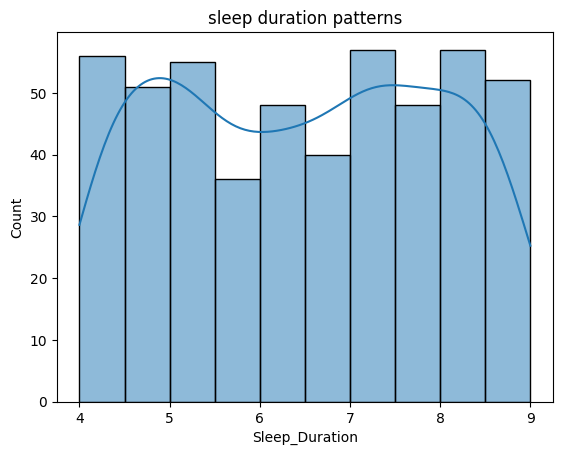

In [109]:
sns.histplot(data=sleep,x='Sleep_Duration',kde=True)
plt.title('sleep duration patterns')
plt.show()

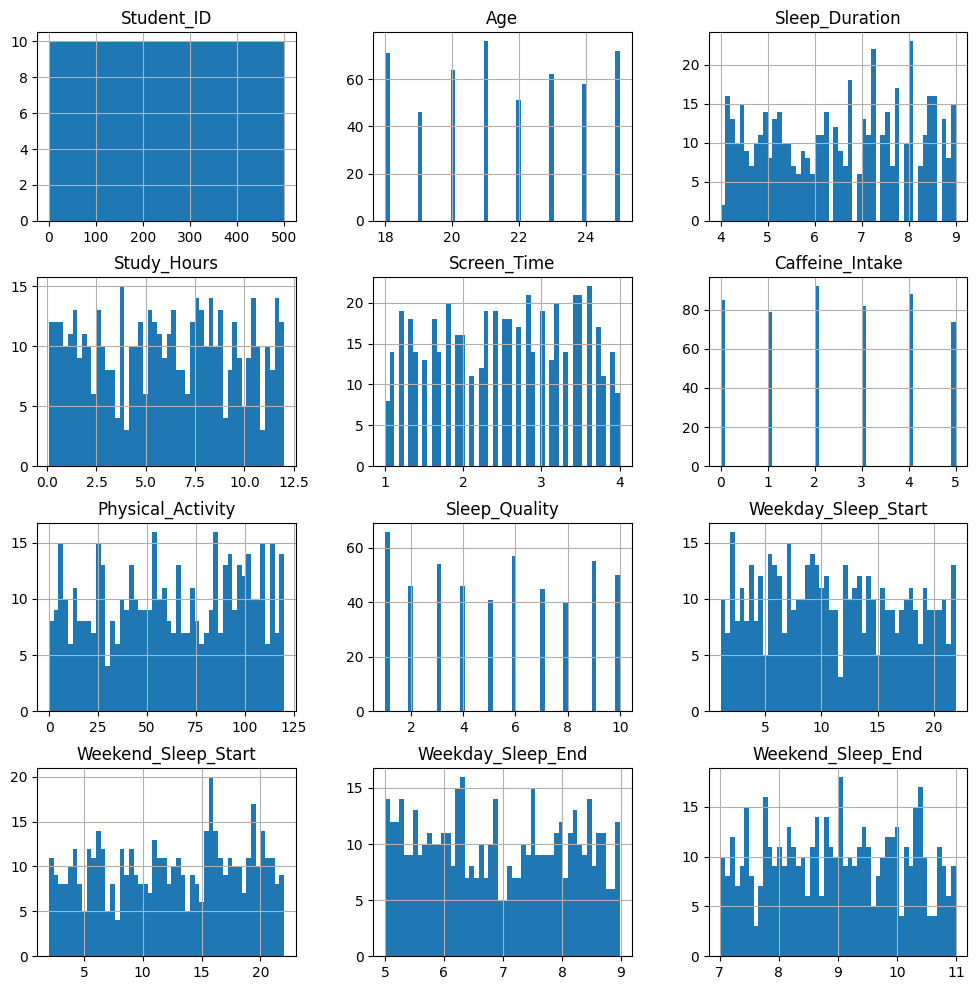

In [139]:
sleep.hist(bins=50, figsize=(12,12))
plt.show()

In [110]:
df=sleep.copy()

In [111]:
# Function to calculate sleep duration
def calculate_sleep_duration(start, end):
    if end >= start:
        return end - start
    else:
        return (24 - start) + end  # Adjust for crossing midnight

# Apply the function to calculate Weekday and Weekend Sleep Durations
df['Weekday_Sleep_Duration'] = df.apply(lambda row: calculate_sleep_duration(row['Weekday_Sleep_Start'], row['Weekday_Sleep_End']), axis=1)
df['Weekend_Sleep_Duration'] = df.apply(lambda row: calculate_sleep_duration(row['Weekend_Sleep_Start'], row['Weekend_Sleep_End']), axis=1)

# Calculate average sleep duration
df['Average_Sleep_Duration'] = (df['Weekday_Sleep_Duration'] + df['Weekend_Sleep_Duration']) / 2


In [112]:
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Weekday_Sleep_Duration,Weekend_Sleep_Duration,Average_Sleep_Duration
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,17.25,3.01,10.130
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,23.48,3.11,13.295
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,10.88,14.45,12.665
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,10.87,5.34,8.105
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,12.00,2.89,7.445


In [113]:
def sleep_classifier(row):
  if row['Average_Sleep_Duration'] < 6:
    return 'short sleeper'
  elif  6<= row['Average_Sleep_Duration'] <=8:
    return 'average sleeper'
  else:
    return 'long sleeper'

df['sleep_model']=df.apply(sleep_classifier,axis=1)


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Gender                  500 non-null    object 
 3   University_Year         500 non-null    object 
 4   Sleep_Duration          500 non-null    float64
 5   Study_Hours             500 non-null    float64
 6   Screen_Time             500 non-null    float64
 7   Caffeine_Intake         500 non-null    int64  
 8   Physical_Activity       500 non-null    int64  
 9   Sleep_Quality           500 non-null    int64  
 10  Weekday_Sleep_Start     500 non-null    float64
 11  Weekend_Sleep_Start     500 non-null    float64
 12  Weekday_Sleep_End       500 non-null    float64
 13  Weekend_Sleep_End       500 non-null    float64
 14  Weekday_Sleep_Duration  500 non-null    fl

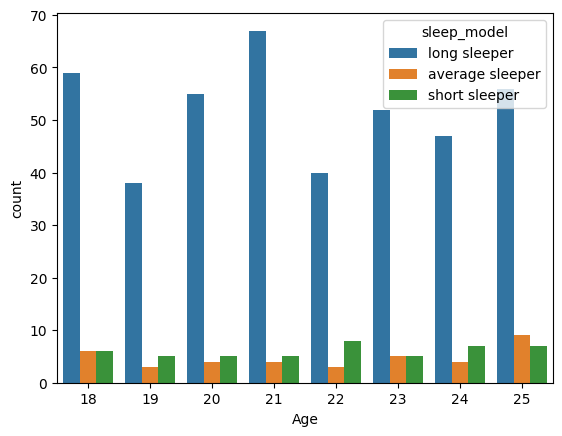

In [132]:
age_model=df.groupby('Age')['sleep_model'].value_counts().reset_index()
sns.barplot(data=age_model,x='Age',y='count',hue='sleep_model')
plt.show()

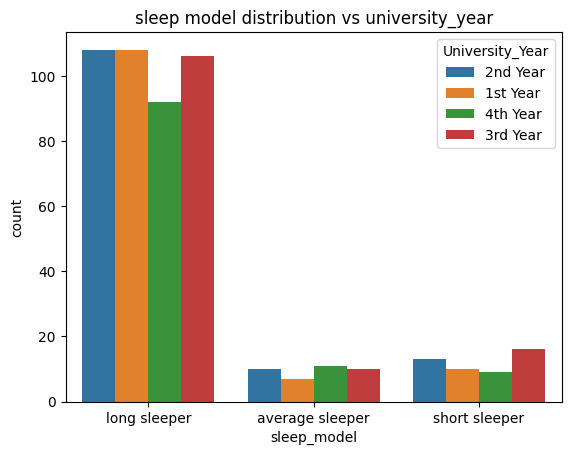

In [115]:
sns.countplot(data=df,x='sleep_model',hue='University_Year')
plt.title('sleep model distribution vs university_year')
plt.show()


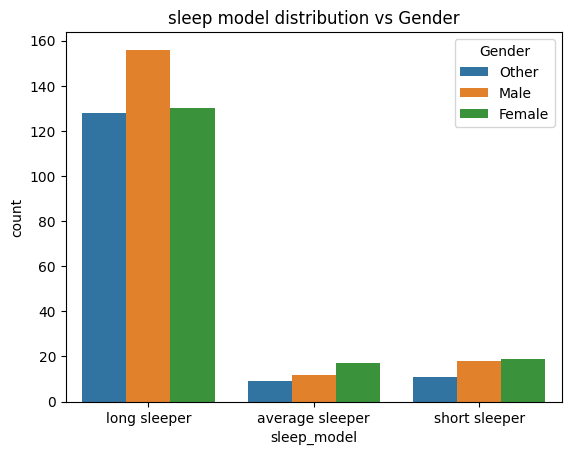

In [116]:
sns.countplot(data=df,x='sleep_model',hue='Gender')
plt.title('sleep model distribution vs Gender')
plt.show()

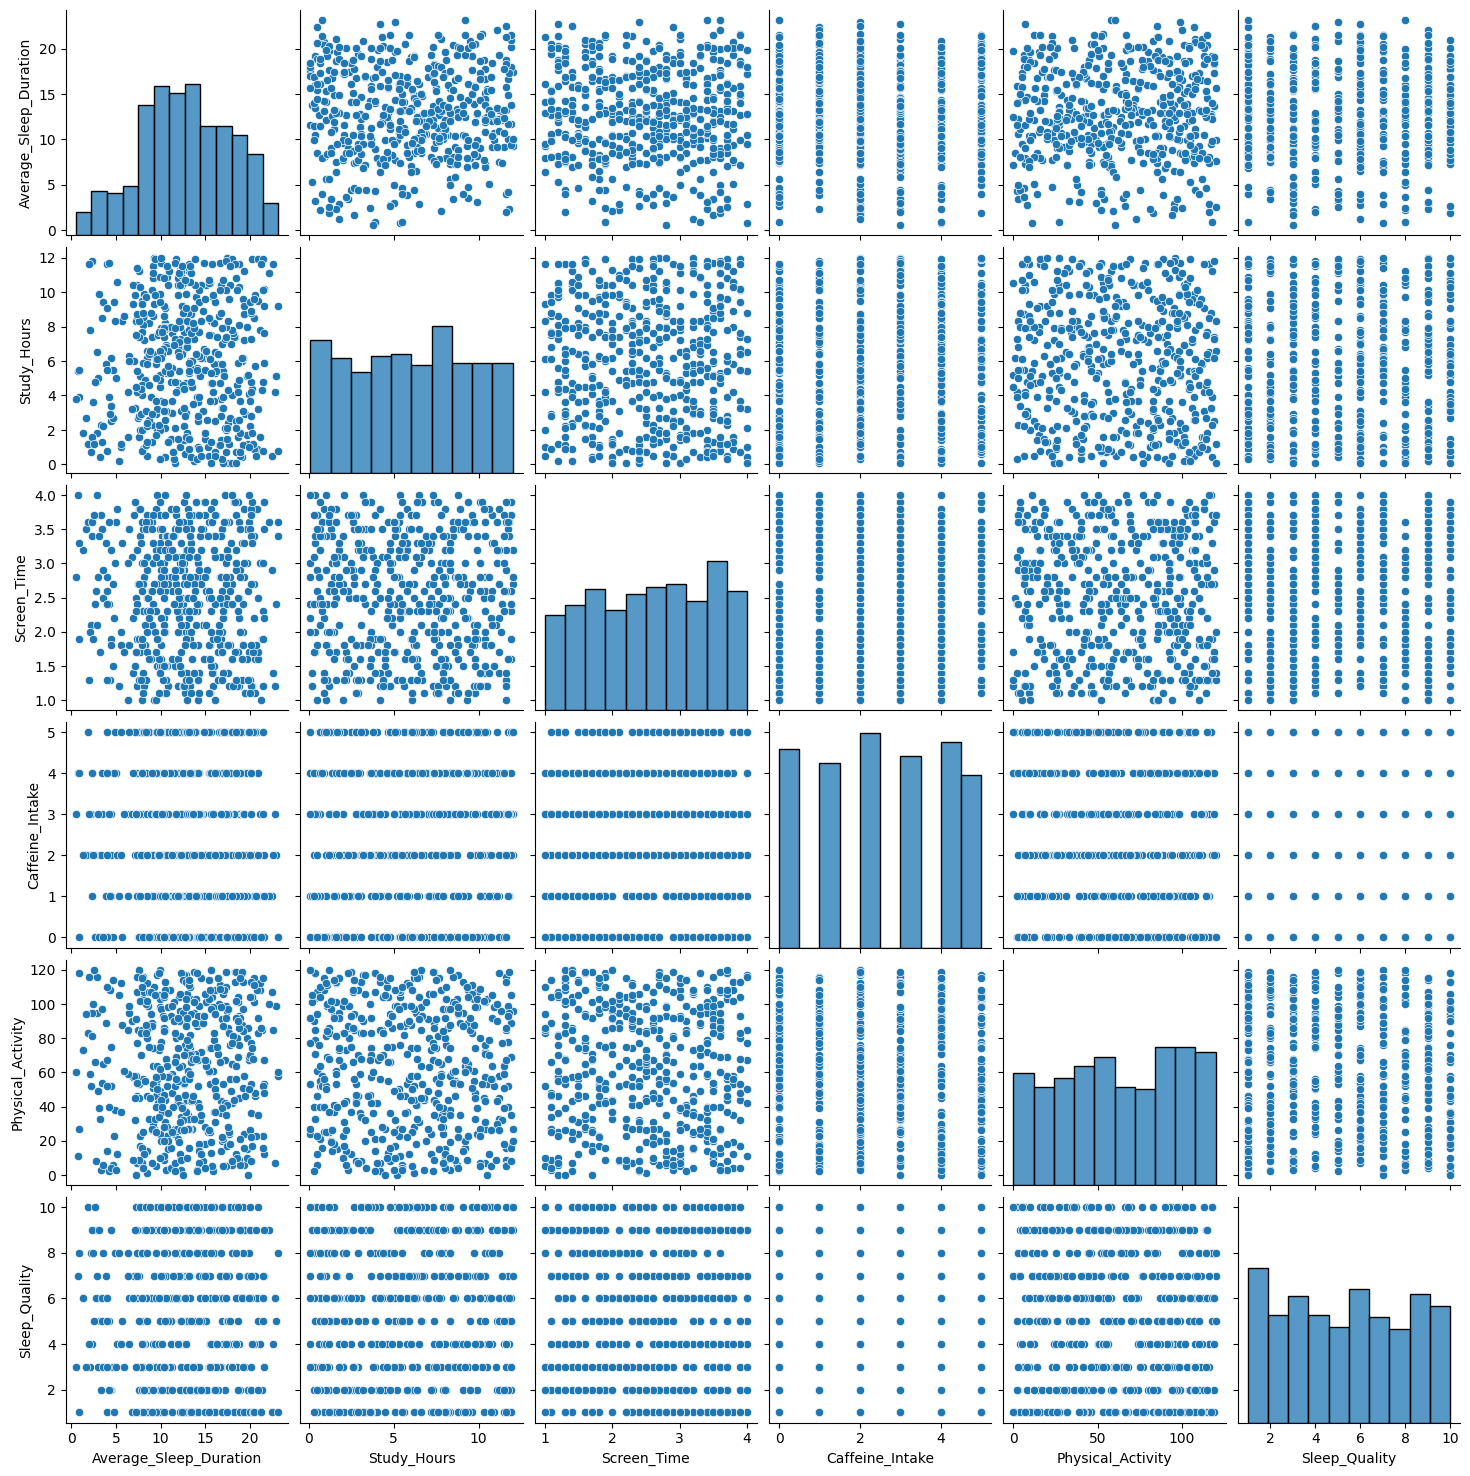

In [117]:
sns.pairplot(df[['Average_Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality']])
plt.show()


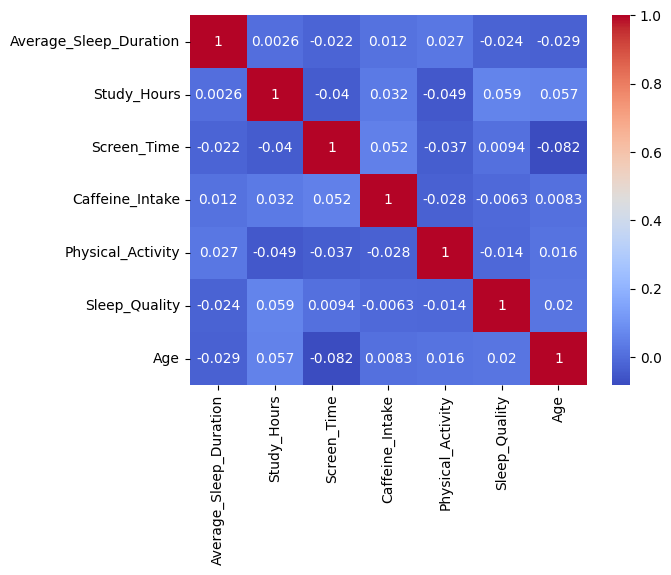

In [118]:
corr_matrix = df[['Average_Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality','Age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [119]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode University Year
df['University_Year_Encoded'] = label_encoder.fit_transform(df['University_Year'])
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

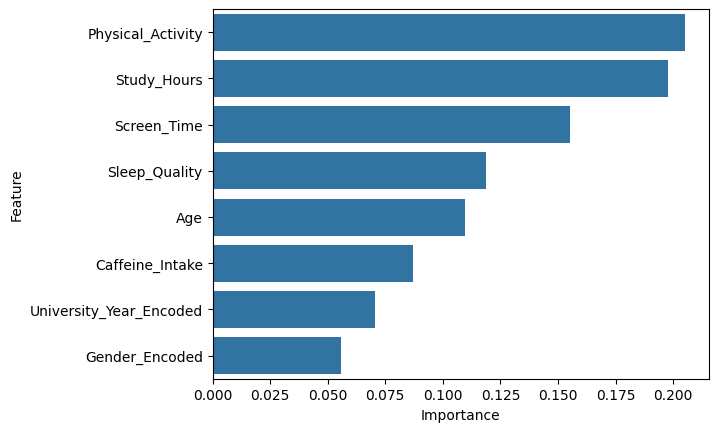

In [120]:
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df[['Age', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality','University_Year_Encoded','Gender_Encoded']]
y = df['sleep_model']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.show()


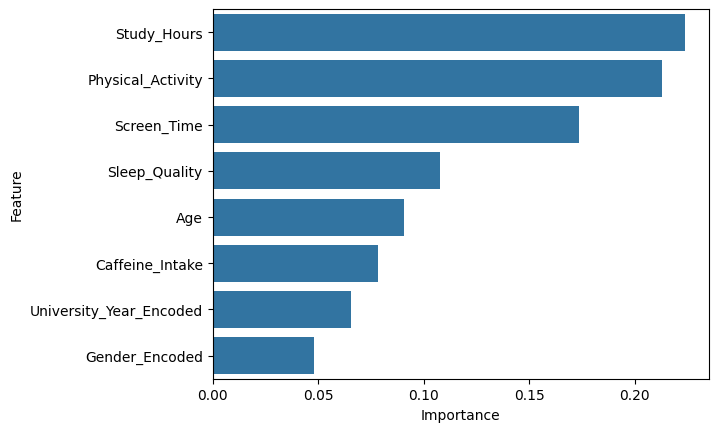

In [121]:


# Define the features and target variable
X = df[['Age', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality','University_Year_Encoded','Gender_Encoded']]
y = df['Average_Sleep_Duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort and plot feature importances
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.show()
